In [1]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/SuicideAndDepression_Detection.csv', engine = 'python',error_bad_lines=False)


<ipython-input-1-0f111290e794>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('/content/drive/MyDrive/SuicideAndDepression_Detection.csv', engine = 'python',error_bad_lines=False)


In [2]:
dataset = dataset.drop(dataset[dataset['class'] == 'SuicideWatch'].sample(frac=1).index)


In [3]:
dataset = dataset.iloc[:30000]


In [4]:
dataset['labels'] = dataset['class']
dataset['labels'].replace(['teenagers', 'depression'],
                        [0, 1], inplace=True)
dataset.reset_index(inplace = True, drop = True)
dataset.head(10)

,text,class,labels
0,Does life actually work for most / non-depress...,depression,1.0
1,I found my friend's bodyIt was almost nine yea...,depression,1.0
2,Am I weird I don't get affected by compliments...,teenagers,0.0
3,Finally 2020 is almost over... So I can never ...,teenagers,0.0
4,"Reddit, I've never opened up to anyone with my...",depression,1.0
5,Somebody help me.I just had a terrible episode...,depression,1.0
6,I can't do this anymoreI've hidden away all su...,depression,1.0
7,the bla bla bla on drugs and crappy health ins...,depression,1.0
8,Drank to feel better for the first timeHi. So...,depression,1.0
9,The people in my life who I am closest to and ...,depression,1.0


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
nltk.download('all')
stemmer = PorterStemmer()

def preprocess1(text):
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

clean_text = []
for i in range(dataset.shape[0]):
  sentence = preprocess1(dataset.loc[i].at['text'])
  clean_text.append(sentence)
dataset['clean_text'] = clean_text
dataset.head(10)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

,text,class,labels,clean_text
0,Does life actually work for most / non-depress...,depression,1.0,life actual work nondepress peopleit doesnt se...
1,I found my friend's bodyIt was almost nine yea...,depression,1.0,found friend bodyit almost nine year ago still...
2,Am I weird I don't get affected by compliments...,teenagers,0.0,weird dont get affect compliment come someon k...
3,Finally 2020 is almost over... So I can never ...,teenagers,0.0,final 2020 almost never hear 2020 bad year eve...
4,"Reddit, I've never opened up to anyone with my...",depression,1.0,reddit ive never open anyon life problem much ...
5,Somebody help me.I just had a terrible episode...,depression,1.0,somebodi help mei terribl episod tonight feel ...
6,I can't do this anymoreI've hidden away all su...,depression,1.0,cant anymor hidden away summer room cant even ...
7,the bla bla bla on drugs and crappy health ins...,depression,1.0,bla bla bla drug crappi health insur rant ill ...
8,Drank to feel better for the first timeHi. So...,depression,1.0,drank feel better first timehi hope peopl know...
9,The people in my life who I am closest to and ...,depression,1.0,peopl life closest feel love toward suffer way...


In [6]:
dataset = dataset.drop(['class'],axis=1)
dataset.head(5)

,text,labels,clean_text
0,Does life actually work for most / non-depress...,1.0,life actual work nondepress peopleit doesnt se...
1,I found my friend's bodyIt was almost nine yea...,1.0,found friend bodyit almost nine year ago still...
2,Am I weird I don't get affected by compliments...,0.0,weird dont get affect compliment come someon k...
3,Finally 2020 is almost over... So I can never ...,0.0,final 2020 almost never hear 2020 bad year eve...
4,"Reddit, I've never opened up to anyone with my...",1.0,reddit ive never open anyon life problem much ...


In [7]:
dataset = dataset.dropna()
dataset = dataset.drop(['clean_text'],axis=1)


In [8]:
dataset.shape

(29996, 2)

In [9]:
from sklearn.model_selection import train_test_split

X = dataset['text']
y = dataset['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def preprocess(text):
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    pos_tags = nltk.pos_tag(stemmed_tokens)
    pos_tags = [word for word in pos_tags if word not in stop_words]
    return ' '.join(str(pos_tags))
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [ ]:
dataset.shape

(17328, 2)

In [11]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [12]:
!pip install tensorflow
import tensorflow
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential


In [13]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to a fixed length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [14]:
y_train = np.asarray(y_train)

In [ ]:
# import numpy as np

# def vectorize(sentence):
#     words = sentence.split()
#     words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
#     if len(words_vecs) == 0:
#         return np.zeros(100)
#     words_vecs = np.array(words_vecs)
#     return words_vecs.mean(axis=0)

# X_train = np.array([vectorize(sentence) for sentence in X_train])
# X_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
from tensorflow.keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
hidden_layer = 3
lstm_node = 32
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))
print(lstm_node)
for i in range(0,hidden_layer):
    model.add(Bidirectional(LSTM(lstm_node,return_sequences=True, recurrent_dropout=0.2)))
    model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.2)))
model.add(Dropout(0.5))
#model.add(TimeDistributed(Dense(256)))
#model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                  metrics=['accuracy'])

32


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
375/375 [==============================] - 460s 1s/step - loss: 0.6066 - accuracy: 0.6677 - val_loss: 0.5738 - val_accuracy: 0.6907
Epoch 2/50
375/375 [==============================] - 425s 1s/step - loss: 0.5400 - accuracy: 0.7310 - val_loss: 0.5052 - val_accuracy: 0.7593
Epoch 3/50
375/375 [==============================] - 396s 1s/step - loss: 0.5047 - accuracy: 0.7588 - val_loss: 0.4942 - val_accuracy: 0.7718
Epoch 4/50
375/375 [==============================] - 394s 1s/step - loss: 0.4775 - accuracy: 0.7766 - val_loss: 0.4523 - val_accuracy: 0.7897
Epoch 5/50
375/375 [==============================] - 391s 1s/step - loss: 0.4566 - accuracy: 0.7891 - val_loss: 0.4688 - val_accuracy: 0.7863
Epoch 6/50
375/375 [==============================] - 393s 1s/step - loss: 0.4431 - accuracy: 0.7947 - val_loss: 0.4860 - val_accuracy: 0.7517
Epoch 7/50
375/375 [==============================] - 368s 980ms/step - loss: 0.4306 - accuracy: 0.8049 - val_loss: 0.4401 - val_accuracy: 0.7

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
dataset['labels'].value_counts()


1.0    15011
0.0    14985
Name: labels, dtype: int64

In [ ]:
import tensorflow
model.save("/content/drive/MyDrive/mymodel2.h5")

In [15]:
import tensorflow

model = tensorflow.keras.models.load_model("/content/drive/MyDrive/mymodel2.h5")

In [16]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 47s 226ms/step - loss: 0.4333 - accuracy: 0.8247


[0.43326374888420105, 0.8246666789054871]

In [17]:
y_pred = model.predict(X_test)

188/188 [==============================] - 36s 183ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
import sklearn
print(sklearn.metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2999
           1       0.83      0.82      0.82      3001

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



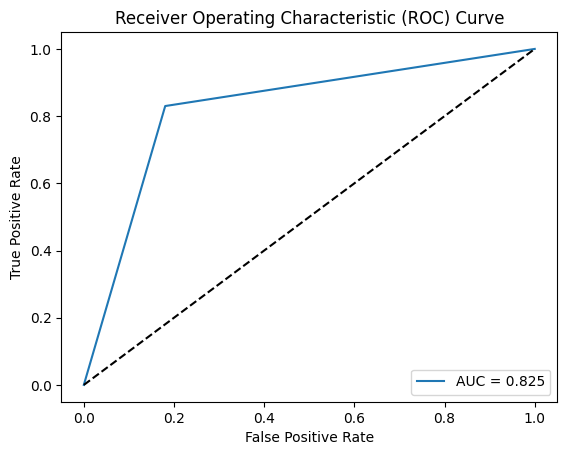

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc_score = roc_auc_score(y_test, y_pred)

# Get the false positive rate (fpr) and true positive rate (tpr) for the AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## NAIVE BAYES

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_train, y_train)
selected_indices = selector.get_support(indices=True)
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]




In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = GaussianNB()
classifier.fit(X_train_selected, y_train)
y_pred1 = classifier.predict(X_test_selected)
accuracy_score(y_test, y_pred1)

0.6005

In [24]:
# from xgboost import XGBClassifier
# classifier2 = XGBClassifier()
# classifier2.fit(X_train, y_train)
# y_pred2 = classifier2.predict(X_test)
# accuracy_score(y_test, y_pred2)

0.7158333333333333

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier3 = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
# classifier3.fit(X_train, y_train)
# y_pred3 = classifier3.predict(X_test)
# accuracy_score(y_test, y_pred3)


0.6225

In [ ]:
# from sklearn.svm import SVC #based on extreme consitions thus is special
# classifier4 = SVC(kernel = 'linear', random_state = 0)
# classifier4.fit(X_train, y_train)
# y_pred4 = classifier4.predict(X_test)
# accuracy_score(y_test, y_pred4)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier5.fit(X_train, y_train)
# y_pred5 = classifier5.predict(X_test)
# accuracy_score(y_test, y_pred5)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier6.fit(X_train, y_train)
# y_pred6 = classifier6.predict(X_test)
# accuracy_score(y_test, y_pred6)

In [ ]:
# import sklearn
# print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.54      0.62      3047
         1.0       0.63      0.80      0.70      2953

    accuracy                           0.67      6000
   macro avg       0.68      0.67      0.66      6000
weighted avg       0.68      0.67      0.66      6000



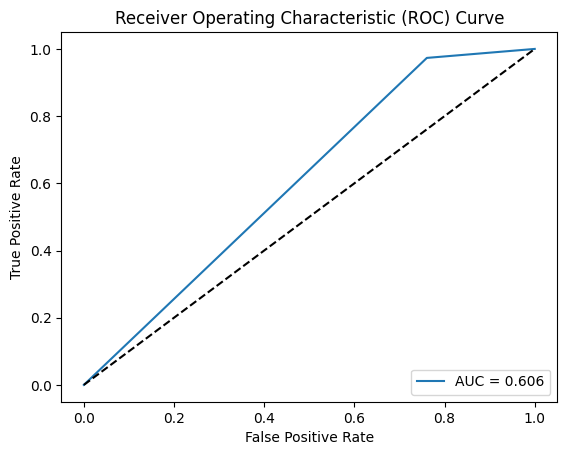

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc_score = roc_auc_score(y_test, y_pred1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Ensemble

In [29]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import load_model

# Assuming you have a list of classifier models stored in 'classifier_model_list'
# and a list of sequential models stored in 'sequential_model_list'
classifier_model_list = [classifier]
# Create tuples of (model_name, model) for each classifier model
classifier_model_tuple_list = [('classifier_model_{}'.format(i), model) for i, model in enumerate(classifier_model_list)]


sequential_model_list = [model]
# Load the sequential models
sequential_models = [model_path for model_path in sequential_model_list]

# Create a VotingClassifier for classifier models
voting_classifier = VotingClassifier(estimators=classifier_model_tuple_list, voting='hard')

# Make predictions using the classifier models
classifier_predictions = []
for modela in classifier_model_list:
    classifier_predictions.append(modela.predict(X_test_selected))

# Make predictions using the sequential models
sequential_predictions = []
for modelb in sequential_models:
    sequential_predictions.append(modelb.predict(X_test))

# Perform ensemble by combining the predictions
# sequential_predictions = np.array(sequential_predictions).reshape(600, 1)
# sequential_predictions = sequential_predictions.transpose()
# print(np.array(sequential_predictions)).shape


print(np.array(classifier_predictions).shape)
print(np.array(sequential_predictions).shape)

sp = np.argmax(np.array(sequential_predictions), axis = 2)
sp.shape
ensemble_predictions = np.mean(classifier_predictions + sp, axis=0)
ensemble_predictions = [(g + h) / 2 for g, h in zip(sp, classifier_predictions)]
# Get the predicted class labels by selecting the class with the highest probability
ensemble_class_labels = [np.round(x) for x in ensemble_predictions]
# You can then use 'ensemble_class_labels' as your final prediction

188/188 [==============================] - 29s 150ms/step
(1, 6000)
(1, 6000, 2)


In [ ]:
print(sklearn.metrics.classification_report(np.array(ensemble_class_labels).flatten(), np.array(y_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      3052
         1.0       0.82      0.82      0.82      2948

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



In [ ]:
ensemble_accuracy = np.mean(np.array(ensemble_class_labels).flatten() == np.array(y_test)) * 100

print("Ensemble Accuracy: {:.2f}%".format(ensemble_accuracy))

Ensemble Accuracy: 80.72%


In [ ]:
# from sklearn.model_selection import KFold, cross_val_score
# k = 20
# kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# # Perform k-fold cross-validation
# scores = cross_val_score(voting_classifier, X_test, y_test, cv=kfold)

# # Print the accuracy scores for each fold
# for fold, score in enumerate(scores):
#     print(f"Fold {fold+1}: {score}")

# # Calculate the mean accuracy across all folds
# mean_accuracy = scores.mean()
# print("Mean Accuracy:", mean_accuracy)

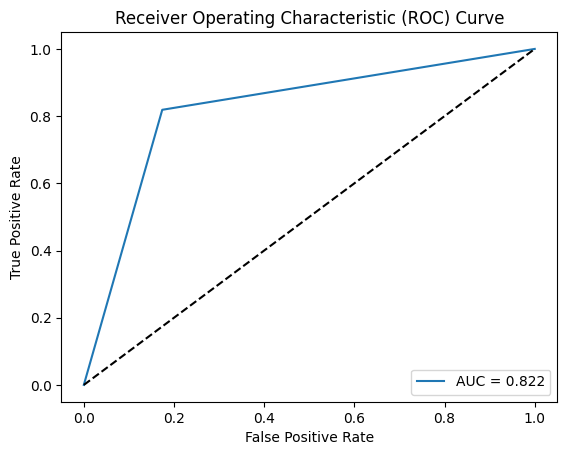

In [ ]:
# import sklearn
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt
# auc_score = roc_auc_score(y_test, ensemble_class_labels[0])

# # Get the false positive rate (fpr) and true positive rate (tpr) for the AUC curve
# fpr, tpr, thresholds = roc_curve(y_test, ensemble_class_labels[0])

# # Plot the AUC curve
# plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
# plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

## Gradient boosting ensemble

In [26]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
# from keras.preprocessing.sequence import pad_sequences

# Step 1: Train the BiLSTM model
# Assuming you have your data and labels stored in X and y, preprocess them accordingly
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)



# Step 2: Generate predictions from BiLSTM model
# bi_lstm_predictions = model.predict(X_test)

# Step 3: Train the Naive Bayes model
# naive_bayes_model = GaussianNB()
# naive_bayes_model.fit(X_train, y_train)

# Step 4: Generate predictions with Naive Bayes
# naive_bayes_predictions = naive_bayes_model.predict(X_val)

# Step 5: Combine predictions
ensemble_features = np.column_stack((y_pred, y_pred1))

# Step 6: Train the gradient boosting ensemble
ensemble_model = GradientBoostingClassifier()
ensemble_model.fit(ensemble_features, y_test)

# Step 7: Tune hyperparameters (optional)
# You can use techniques like GridSearchCV to search for the best hyperparameters

# Step 8: Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(ensemble_features)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.8331666666666667


In [22]:
import sklearn
print(sklearn.metrics.classification_report(np.array(ensemble_predictions).flatten(), np.array(y_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      2878
         1.0       0.86      0.81      0.84      3122

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000



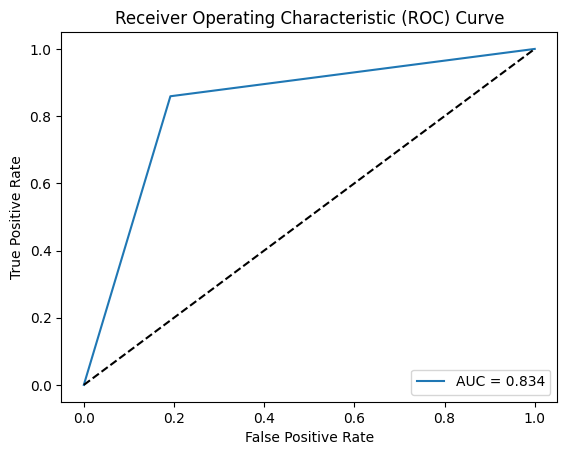

In [23]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc_score = roc_auc_score(y_test, ensemble_predictions)

# Get the false positive rate (fpr) and true positive rate (tpr) for the AUC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_predictions)

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()